<a href="https://colab.research.google.com/github/simonheilig/bci_challenge/blob/main/bci_challenge_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Immunohistochemical Image Generation Challenge

## Dataset and Dataloader

Mounted at /content/drive
Feature batch shape: torch.Size([64, 3, 1024, 1024])
Labels batch shape: torch.Size([64, 3, 1024, 1024])


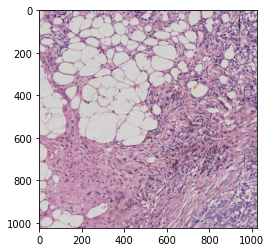

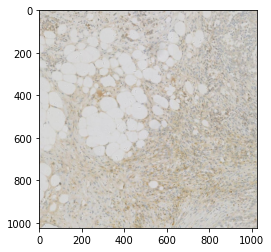

In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount('/content/drive')

class BCI_Dataset(Dataset):
    def __init__(self, img_dir):
        self.img_dir = img_dir
        search_path = os.path.join(self.img_dir,'HE')
        self.filenames = {i:os.path.basename(x) for i,x in enumerate(os.listdir(search_path))}
        
    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        he_path = os.path.join(self.img_dir,'HE', self.filenames[idx])
        he = read_image(he_path)
        ihc_path = os.path.join(self.img_dir,'IHC', self.filenames[idx])
        ihc = read_image(ihc_path)
        return he, ihc

train_data = BCI_Dataset("drive/MyDrive/train/")
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].squeeze()
plt.imshow(img.permute(1, 2, 0))
plt.show()
plt.imshow(label.permute(1, 2, 0))
plt.show()